In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# Cargar datos
df = pd.read_csv('house-prices.csv')

In [5]:
# Exploración de datos
print("Primeras filas del dataframe:")
print(df.head())

print("\nInformación de los datos:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())


Primeras filas del dataframe:
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object

In [6]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


In [10]:
# Preparación de datos
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]  # Variables independientes
y = df['Price']  # Variable dependiente

In [11]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [24]:
# Evaluación del modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMSE: {mse:.2f}")
print(f"R²: {r2:.2f}")



MSE: 320149938.23
R²: 0.46


In [25]:
# Predicción
nueva_casa = pd.DataFrame({'SqFt': [2000], 'Bedrooms': [3], 'Bathrooms': [2]})
precio_predicho = modelo.predict(nueva_casa)
print(f"\nPrecio predicho: ${precio_predicho[0]:.2f}")



Precio predicho: $123537.00


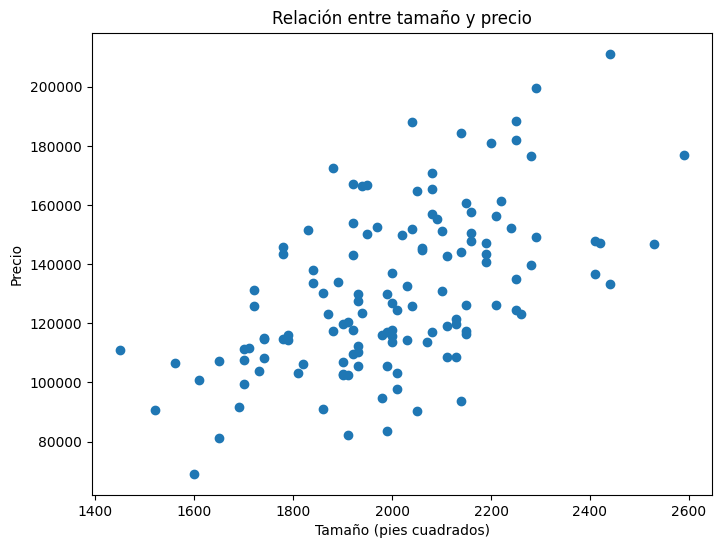

In [26]:
# Visualizar relación entre variables
plt.figure(figsize=(8,6))
plt.scatter(df['SqFt'], df['Price'])
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio')
plt.title('Relación entre tamaño y precio')
plt.show()